<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regressão-Logística" data-toc-modified-id="Regressão-Logística-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regressão Logística</a></span><ul class="toc-item"><li><span><a href="#Lendo-e-Explorando-Dados" data-toc-modified-id="Lendo-e-Explorando-Dados-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Lendo e Explorando Dados</a></span></li><li><span><a href="#Função--Sigmoidal" data-toc-modified-id="Função--Sigmoidal-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Função  Sigmoidal</a></span></li></ul></li></ul></div>

Este notebook tem por objetivo implementar o algoritmo de Regressão Logística para solução dos problemas propostos no exercício 2 do curso de Machine Learning da Universidade de Stanford. Neste ponto de criação do notebook, as tarefas propostas para este exercício já foram implementadas em ```Octave``` e a ideia é transpassa-los para ```Python``` utilizando, em primeira instância, propriedades de Álgebra Linear através do NumPy e, em um segundo momento, utilizando a biblioteca ```scikit-learn```.

Na primeira parte deste exercício, é proposto um problema de Regressão Logística para prever se um estudante será aprovado ou não em determinada disciplina, tendo em mãos notas históricas de candidatos anteriores que foram aprovados ou reprovados. O dataset contém notas de cada participante em dois exames e, como label, a decisão de aprovação.

## Regressão Logística

Para resolver este problema, será necessário implementar um algoritmo de classificação para determinar a probabilidade de admissão do estudante baseado nos scores de dois exames.

### Lendo e Explorando Dados

In [3]:
# Importando biblioteca
import numpy as np

dataset = np.loadtxt('ex2data1.txt', delimiter=',')

In [4]:
# Verificando atributos
print(f'Dimensões: {dataset.shape}')

Dimensões: (100, 3)


In [5]:
# Primeiras linhas
dataset[:5]

array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ]])

Percebe-se que a última coluna, nosso label y, está identificado apena como 0 e 1, sendo:
    - 0: aluno reprovado
    - 1: aluno aprovado

In [10]:
# Visualizando os dados
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# Separando os dados
aprovados = dataset[dataset[:, 2] == 1][:, :2]
reprovados = dataset[dataset[:, 2] == 0][:, :2]

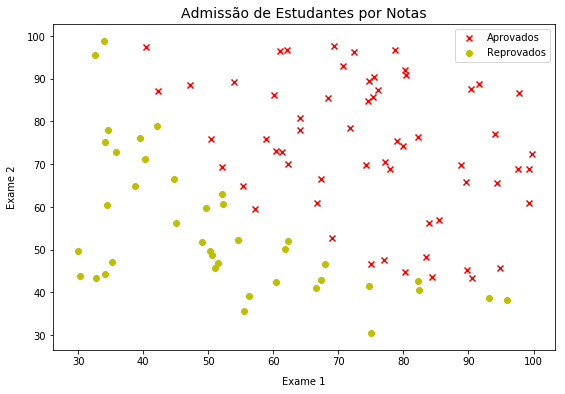

In [32]:
# Plotando dados
fig = plt.figure(figsize=(9, 6))
plt.scatter(aprovados[:, 0], aprovados[:, 1], marker='x', c='r')
plt.scatter(reprovados[:, 0], reprovados[:, 1], marker='o', c='y')
plt.title('Admissão de Estudantes por Notas', size=14)
plt.xlabel('Exame 1', size=10, labelpad=10)
plt.ylabel('Exame 2', size=10, labelpad=10)
plt.legend(['Aprovados', 'Reprovados'])
plt.show()

### Função  Sigmoidal

Antes de darmos continuidade a implementação do algoritmo de classificação, é importante definir, em linhas de código, o cálculo da função sigmoidal que, por sua vez, irá definir se, dada uma entrada de exames, o aluno foi aprovado (com y=1) ou reprovado (com y=0)

\begin{equation*}
h_\theta(x)=g(\theta^Tx)
\end{equation*}

\begin{equation*}
    g(z)=\frac{1}{1+e^{-z}}
\end{equation*}

In [35]:
# Testando
np.exp(0)

1.0

In [36]:
# Testando
np.exp(1e128)

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


inf

Fonte: [numpy.exp](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.exp.html)

In [38]:
# Último teste
1 / (1 + np.exp(0))

0.5

In [41]:
# Definindo função
def sigmoid(z):
    """Função responsável por calcular o resultado sigmoidal, dado o parâmetro z
    Input:
        z: parâmetro z definido por theta.T * x
    Output:
        g(z): função sigmoidal aplicada ao parâmetro z"""
    return 1 / (1 + np.exp(-z))

In [42]:
# Testes
print(f'Função sigmoidal com z = 0 (valor esperado: 0.5): {sigmoid(0)}')
print(f'Função sigmoidal com z = inf (valor esperado: 1): {sigmoid(1e128)}')
print(f'Função sigmoidal com z = -inf (valor esperado: 0): {sigmoid(-1e128)}')

Função sigmoidal com z = 0 (valor esperado: 0.5): 0.5
Função sigmoidal com z = inf (valor esperado: 1): 1.0
Função sigmoidal com z = -inf (valor esperado: 0): 0.0


C:\Users\thiagoPanini\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
